# Porting Sparse Filtering from *numpy* to *Tensorflow*

In this notebook we review the porting of the sparse filtering (SF) from its basic python implementation in *numpy* into a *tensorflow* module.

1. Definition of SF
2. Analysis of npSF code
3. Analysis of tfSF code
4. Comparison of npSF vs tfSF

Before starting we import libraries:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Definition of SF

The SF algorithm was first proposed by Ngiam et al. [1]. An implementation of the algorithm in *Matlab* was provided by the authors [2]. A first porting in python was made public in [3]; a further porting and extension is provided at [4].

## 2. Analysis of npSF code

From now on we will refer to the basic implementation of SF relying on *numpy* as **npSF**. The implementation we refer to is avaiable at ; this is a simplified version of the code in [4].

### Structure
The code of *npSf.py* is organized as follows:
- **External functions**: support functions
    - *Normalizations*:
        - l2row(): L2-normalization along the rows
        - l2rowg(): derivative of L2-normalization along the rows
    - *Non-linearities*:
        - softabsolute(): soft-abs function
        - deriv_softabsolute(): derivative of soft-abs function
- **SFilter class**: instantiates an object that constitute a shallow SF algorithm
    - *Initializers*:
        - setFeatures(): method to set the number of learned features
        - setTrainData(): method to set the training data
        - setWeights(): method to set the weights
        - initializeWeights(): method to randomly initialize the weights
        - initializeNotebook(): method to initialize the logging systems
    - *Training":
        - train(): method to train the SF module
        - callbackIteration(): method to manage the logging
        - writeNotebook(): method to persist the logging
    - *Feedforward*:
        - feedForward(): method to process data

### Usage

Use of the npSF code is straigthforward. First, we generate sample data $X$.

In [2]:
maxX = 5
minX = -5

n_samples = 10
original_features = 2 

X = (minX-maxX) * np.random.rand(n_samples,original_features) + maxX

Next, we instantiate a npSF module.

In [3]:
import npSF
npsf = npSF.SFilter()

We specify the number of learned features, we set the training data, we initialize the weights and the logging system.

In [4]:
npsf.setFeatures(2)
npsf.setTrainData(X)
npsf.initializeWeights()
npsf.initialiazeNotebook()

Finally, we train the module.

In [5]:
npsf.train()

We can now obtain the learned representation of the data:

In [6]:
Z = npsf.feedForward(X)

We can now plot and observe the original data and the learned representation.

Text(0.5, 1.0, 'Learned data')

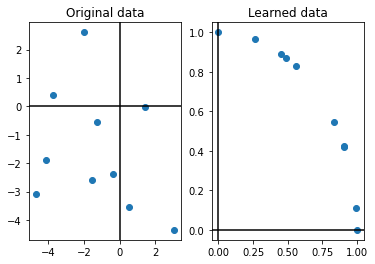

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(X[:,0],X[:,1])
ax[0].axhline(0,color='black')
ax[0].axvline(0,color='black')
ax[0].set_title('Original data')

ax[1].scatter(Z[:,0],Z[:,1])
ax[1].axhline(0,color='black')
ax[1].axvline(0,color='black')
ax[1].set_title('Learned data')

## 2. Analysis of tfSF code

From now on we will refer to the implementation of SF relying on *tensorflow* as **tfSF**. The implementation we refer to is avaiable at .

### Structure
The code of *npSf.py* is organized as follows:
- **External functions**: support functions
    - *Losses*:
        - L1loss(): L1 loss function
- **SFLayer class**: defines a SF layer as a Keras layer
    - *Initializers*:
        - build(): initialize the weights
    - *Support functions*
        - l2row(): L2-normalization along the rows
        - softabsolute(): soft-abs functionze the weights
    - *Feedforward*:
        - call(): method to process data
- **SFilter class**: instantiates an object that constitute a shallow SF algorithm in the form of a 1-layer Keras neural network
    - *Training":
        - fit(): method to train the SF module
    - *Feedforward*:
        - transform(): method to process data
        
In this new implementation the algorithm of SF is implemented as a neural network layer. *SFilter* provides an interface that returns a neural network with a single SF layer.

Use of the npSF code is straigthforward. Using the data $X$ we generated before, we instantiate a tfSF module, at the same time specifying the number of features we want to learn.

In [8]:
import tfSF
tfsf = tfSF.SFilter(n_features=2)

In [9]:
X

array([[ 1.42461530e+00, -3.49685745e-03],
       [-1.24258605e+00, -5.61220254e-01],
       [-1.98530872e+00,  2.61247201e+00],
       [-3.44000701e-01, -2.37249944e+00],
       [-1.52119136e+00, -2.59115131e+00],
       [ 3.04950973e+00, -4.34898255e+00],
       [-3.71716381e+00,  3.86175947e-01],
       [-4.68303290e+00, -3.08033105e+00],
       [-4.11307859e+00, -1.90251055e+00],
       [ 5.35839887e-01, -3.54055141e+00]])

We then fit the model to the data.

In [10]:
tfsf.fit(X,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 3ms/step - loss: 12.8566
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 12.3716
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 12.3438
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 12.2629
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 12.3572
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 12.3274
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 12.2680
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 12.2691
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 12.2444
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 12.2138
Epoch 11/200
1/1 [==============================] - 0s 1ms/step - loss: 12.1867
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 12.1945
Epoch 13/200
1/1 [==============================]

1/1 [==============================] - 0s 2ms/step - loss: 12.1646
Epoch 104/200
1/1 [==============================] - 0s 3ms/step - loss: 12.1830
Epoch 105/200
1/1 [==============================] - 0s 1ms/step - loss: 12.1951
Epoch 106/200
1/1 [==============================] - 0s 4ms/step - loss: 12.1915
Epoch 107/200
1/1 [==============================] - 0s 4ms/step - loss: 12.1787
Epoch 108/200
1/1 [==============================] - 0s 3ms/step - loss: 12.1656
Epoch 109/200
1/1 [==============================] - 0s 2ms/step - loss: 12.1727
Epoch 110/200
1/1 [==============================] - 0s 4ms/step - loss: 12.1757
Epoch 111/200
1/1 [==============================] - 0s 2ms/step - loss: 12.1711
Epoch 112/200
1/1 [==============================] - 0s 3ms/step - loss: 12.1722
Epoch 113/200
1/1 [==============================] - 0s 4ms/step - loss: 12.1741
Epoch 114/200
1/1 [==============================] - 0s 4ms/step - loss: 12.1716
Epoch 115/200
1/1 [=======================

We can then process the data and learn a new representation.

In [11]:
Z = tfsf.transform(X)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Finally, we plot the original data and the learned representations.

Text(0.5, 1.0, 'Learned data')

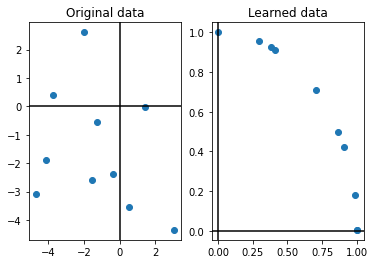

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(X[:,0],X[:,1])
ax[0].axhline(0,color='black')
ax[0].axvline(0,color='black')
ax[0].set_title('Original data')

ax[1].scatter(Z[:,0],Z[:,1])
ax[1].axhline(0,color='black')
ax[1].axvline(0,color='black')
ax[1].set_title('Learned data')

## 4. Comparison of npSF vs tfSF

Although the implement the same algorithm and optimize the same loss function, npSF and tfSF use two different optimization algorithms. npSF relies on **Limited-memory BFGS (L-BFGS)**, a quasi-Newton method that relies on the explicit gradient of the loss function for minimization. tfSF relies on **Adam**, a standard backpropagation algorithm for training neural networks. 

In general, npSF is more efficient as it explicitly exploits the knowledge of the gradient; tfSF is more versatile, as it allows for easier modification of the SF algorithm, leaving the problem of optimization to automatic gradient computation.

We can compare the loss function dynamics of the two algorithms. First, we train a npSF module and retrieve its losses.

In [13]:
npsf.setFeatures(2)
npsf.setTrainData(X)
npsf.initializeWeights()
npsf.initialiazeNotebook()
npsf.train()
npLosses = npsf.notebook['losses']

Similarly, we train a tfSF module and retrieve its losses.

In [14]:
tfsf = tfSF.SFilter(n_features=2)
tfsf.fit(X,epochs=200)
tfLosses = tfsf.hist.history['loss']

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 13.4620
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 13.5969
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 13.2593
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 12.9888
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 12.8523
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 12.9295
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 12.9872
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 13.0007
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 12.9830
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 12.9385
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 12.9013
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 12.9215
Epoch 13/200
1/1 [==============================]

1/1 [==============================] - 0s 2ms/step - loss: 12.4735
Epoch 103/200
1/1 [==============================] - 0s 1ms/step - loss: 12.4800
Epoch 104/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4848
Epoch 105/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4851
Epoch 106/200
1/1 [==============================] - 0s 1ms/step - loss: 12.4801
Epoch 107/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4713
Epoch 108/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4759
Epoch 109/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4743
Epoch 110/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4761
Epoch 111/200
1/1 [==============================] - 0s 1ms/step - loss: 12.4776
Epoch 112/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4738
Epoch 113/200
1/1 [==============================] - 0s 2ms/step - loss: 12.4771
Epoch 114/200
1/1 [=======================

We can now plot and compare the losses.

Text(0, 0.5, 'L1 loss')

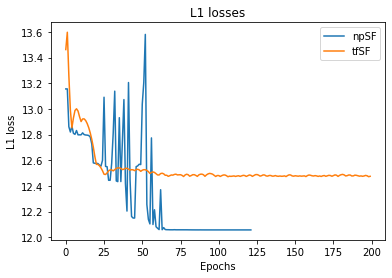

In [15]:
plt.title('L1 losses')    
plt.plot(npLosses, label='npSF')
plt.plot(tfLosses, label='tfSF')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('L1 loss')

We can look more closely at the average final loss of npSF and tfSF across several simulations.

### (a) Loss as a function of the original features

In [16]:
n_simulations = 100

original_features = [2,5,10,15,20,25,50,100]
learned_features = 2
n_samples = 10
n_epochs = 200
    
maxX = 5; minX = -5   

avg_losses = np.zeros((2,len(original_features)))
for i,orig_feats in enumerate(original_features):
    
    print('Original features {0}'.format(orig_feats))
    np_losses = []
    tf_losses = []
    
    for _ in tqdm(range(n_simulations)):
        X = (minX-maxX) * np.random.rand(n_samples,orig_feats) + maxX
        
        npsf = npSF.SFilter(epochs=n_epochs)
        npsf.setFeatures(learned_features)
        npsf.setTrainData(X)
        npsf.initializeWeights()
        npsf.initialiazeNotebook()
        npsf.train()
        np_losses.append(npsf.notebook['losses'][-1])

        tfsf = tfSF.SFilter(n_features=learned_features)
        tfsf.fit(X,epochs=n_epochs,verbose=0)
        tf_losses.append(tfsf.hist.history['loss'][-1])
        
    avg_losses[0,i] = np.mean(np_losses)
    avg_losses[1,i] = np.mean(tf_losses)

  0%|          | 0/100 [00:00<?, ?it/s]

Original features 2


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 5


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 10


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 15


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 20


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 25


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 50


  0%|          | 0/100 [00:00<?, ?it/s]

Original features 100


100%|██████████| 100/100 [02:32<00:00,  1.53s/it]


Text(0, 0.5, 'Final L1 loss')

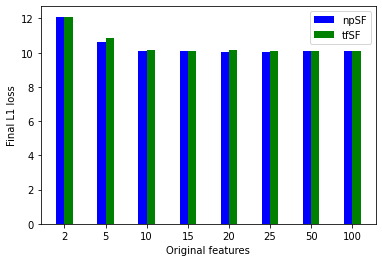

In [17]:
xs = np.arange(0,len(original_features))
plt.bar(xs, avg_losses[0,:], width=0.2, color='b', align='center', label='npSF')
plt.bar(xs+0.2, avg_losses[1,:], width=0.2, color='g', align='center', label='tfSF')
plt.legend()
plt.xticks(np.arange(0,len(original_features))+0.1,[str(i) for i in original_features])
plt.xlabel('Original features')
plt.ylabel('Final L1 loss')

### (b) Loss as a function of the learned features

In [18]:
n_simulations = 100

original_features = 10
learned_features = [2,5,10,15,20,25,50,100]
n_samples = 10
n_epochs = 200
    
maxX = 5; minX = -5   

avg_losses = np.zeros((2,len(learned_features)))
for i,learn_feats in enumerate(learned_features):
    
    print('Learned features {0}'.format(learn_feats))
    np_losses = []
    tf_losses = []
    
    for _ in tqdm(range(n_simulations)):
        X = (minX-maxX) * np.random.rand(n_samples,original_features) + maxX
        
        npsf = npSF.SFilter(epochs=n_epochs)
        npsf.setFeatures(learn_feats)
        npsf.setTrainData(X)
        npsf.initializeWeights()
        npsf.initialiazeNotebook()
        npsf.train()
        np_losses.append(npsf.notebook['losses'][-1])

        tfsf = tfSF.SFilter(n_features=learn_feats)
        tfsf.fit(X,epochs=n_epochs,verbose=0)
        tf_losses.append(tfsf.hist.history['loss'][-1])
        
    avg_losses[0,i] = np.mean(np_losses)
    avg_losses[1,i] = np.mean(tf_losses)

  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 2


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 5


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 10


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 15


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 20


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 25


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 50


  0%|          | 0/100 [00:00<?, ?it/s]

Learned features 100


100%|██████████| 100/100 [02:59<00:00,  1.79s/it]


Text(0, 0.5, 'Final L1 loss')

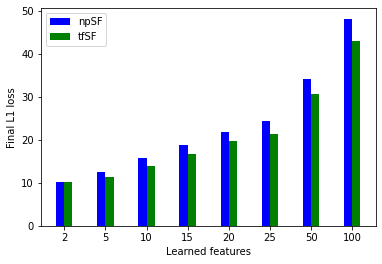

In [19]:
xs = np.arange(0,len(learned_features))
plt.bar(xs, avg_losses[0,:], width=0.2, color='b', align='center', label='npSF')
plt.bar(xs+0.2, avg_losses[1,:], width=0.2, color='g', align='center', label='tfSF')
plt.legend()
plt.xticks(np.arange(0,len(learned_features))+0.1,[str(i) for i in learned_features])
plt.xlabel('Learned features')
plt.ylabel('Final L1 loss')

### (c) Loss as a function of the number of samples

In [20]:
n_simulations = 100

original_features = 10
learned_features = 10
n_samples = [2,5,10,15,20,25,50,100]
n_epochs = 200
    
maxX = 5; minX = -5   

avg_losses = np.zeros((2,len(n_samples)))
for i,n_samp in enumerate(n_samples):
    
    print('Samples {0}'.format(n_samp))
    np_losses = []
    tf_losses = []
    
    for _ in tqdm(range(n_simulations)):
        X = (minX-maxX) * np.random.rand(n_samp,original_features) + maxX
        
        npsf = npSF.SFilter(epochs=n_epochs)
        npsf.setFeatures(learned_features)
        npsf.setTrainData(X)
        npsf.initializeWeights()
        npsf.initialiazeNotebook()
        npsf.train()
        np_losses.append(npsf.notebook['losses'][-1])

        tfsf = tfSF.SFilter(n_features=learned_features)
        tfsf.fit(X,epochs=n_epochs,verbose=0,batchsize=n_samp)
        tf_losses.append(tfsf.hist.history['loss'][-1])
        
    avg_losses[0,i] = np.mean(np_losses)
    avg_losses[1,i] = np.mean(tf_losses)

  0%|          | 0/100 [00:00<?, ?it/s]

Samples 2


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 5


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 10


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 15


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 20


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 25


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 50


  0%|          | 0/100 [00:00<?, ?it/s]

Samples 100


100%|██████████| 100/100 [02:37<00:00,  1.57s/it]


Text(0, 0.5, 'Final L1 loss')

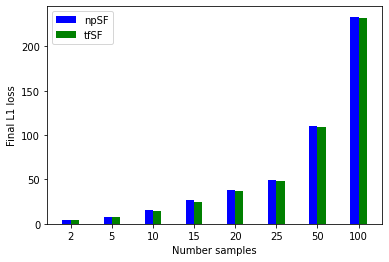

In [21]:
xs = np.arange(0,len(n_samples))
plt.bar(xs, avg_losses[0,:], width=0.2, color='b', align='center', label='npSF')
plt.bar(xs+0.2, avg_losses[1,:], width=0.2, color='g', align='center', label='tfSF')
plt.legend()
plt.xticks(np.arange(0,len(n_samples))+0.1,[str(i) for i in n_samples])
plt.xlabel('Number samples')
plt.ylabel('Final L1 loss')

### References
[1] Ngiam, J., Chen, Z., Bhaskar, S.A., Koh, P.W. and Ng, A.Y., 2011. Sparse filtering. In Advances in neural information processing systems (pp. 1125-1133).

[2] https://github.com/jngiam/sparseFiltering

[3] https://github.com/jmetzen/sparse-filtering

[4] https://github.com/FMZennaro/PSF